In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/joekwon/Desktop/neurosymbolic_rule_breaking/results/experiment_1/experiment-1-pilot.csv'
data = pd.read_csv(file_path)

# Ensure full display of long strings in pandas
pd.set_option('display.max_colwidth', None)



In [6]:
# 1. Analysis for html slider responses

# Extracting relevant data for html slider response
slider_data = data[data['trial_category'] == 'slider_trial']

# Convert response to numeric, forcing errors to NaN
slider_data['response'] = pd.to_numeric(slider_data['response'], errors='coerce')

# Calculate mean and std for each unique question in slider data
slider_summary = slider_data.groupby('question')['response'].agg(['mean', 'std']).reset_index()

# Display the slider summary statistics
print("Slider Summary Statistics:")
print(slider_summary)


Slider Summary Statistics:
                                                                                                                                                                                                    question  \
0                                                             For the 100 people who travel through this area, how do you think the average person would feel if the grass in the park were no longer alive?   
1            For the 100 people who travel through this area, how important do you think it is for the average person who is going to the bus stop that they reach their destination as quickly as possible?   
2         For the 100 people who travel through this area, how important do you think it is for the average person who is going to the coffee shop that they reach their destination as quickly as possible?   
3  For the 100 people who travel through this area, how important do you think it is for the average person who is going to the urgent care c

/var/folders/f2/c92ct4dj19d5n6759lnp5hb40000gn/T/ipykernel_31947/1759157868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slider_data['response'] = pd.to_numeric(slider_data['response'], errors='coerce')


In [8]:
from collections import Counter
import json

# 2. Analysis for multiple choice trial

# Extracting relevant data for multiple choice trial
multiple_choice_data = data[data['trial_category'] == 'multiple_choice_trial']

# Initialize a dictionary to store the counters for each question
response_counters = {}

# Iterate over each row in the multiple choice data
for index, row in multiple_choice_data.iterrows():
    question = row['question']
    response = json.loads(row['response'])
    
    # Initialize the counter for the question if not already done
    if question not in response_counters:
        response_counters[question] = Counter()
    
    # Update the counter with the response
    for key, value in response.items():
        response_counters[question][value] += 1

# Display the counters for each question
for question, counter in response_counters.items():
    print(f"\nQuestion: {question}")
    for response, count in counter.items():
        print(f"Response: {response} - Count: {count}")



Question: Given what you see here, how many people do you estimate could walk on the grass per day before it would no longer be alive?
Response: Between 50-100 people - Count: 6
Response: Between 0-50 people - Count: 3
Response: Between 100-200 people - Count: 1

Question: Who do you think most likely wrote this sign?
Response: A council member who polled the community and measured and analyzed the traffic at the park - Count: 7
Response: A person from the community who doesn't really visit the park - Count: 2
Response: A person from outside the community - Count: 1


In [10]:
# 3. Analysis for free text trial

# Extracting relevant data for free text trial
free_text_data = data[data['trial_category'] == 'free_text_trial']

# Collecting all responses for free text trial
free_text_responses = free_text_data[['question_text', 'response']]

# Display free text responses
print("\nFree Text Responses:")
print(free_text_responses)


Free Text Responses:
                                                                   question_text  \
17   Why do you think the person or people who wrote this sign posted this rule?   
37   Why do you think the person or people who wrote this sign posted this rule?   
57   Why do you think the person or people who wrote this sign posted this rule?   
77   Why do you think the person or people who wrote this sign posted this rule?   
97   Why do you think the person or people who wrote this sign posted this rule?   
117  Why do you think the person or people who wrote this sign posted this rule?   
137  Why do you think the person or people who wrote this sign posted this rule?   
157  Why do you think the person or people who wrote this sign posted this rule?   
177  Why do you think the person or people who wrote this sign posted this rule?   
197  Why do you think the person or people who wrote this sign posted this rule?   

                                                     

/var/folders/f2/c92ct4dj19d5n6759lnp5hb40000gn/T/ipykernel_31947/3519573557.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


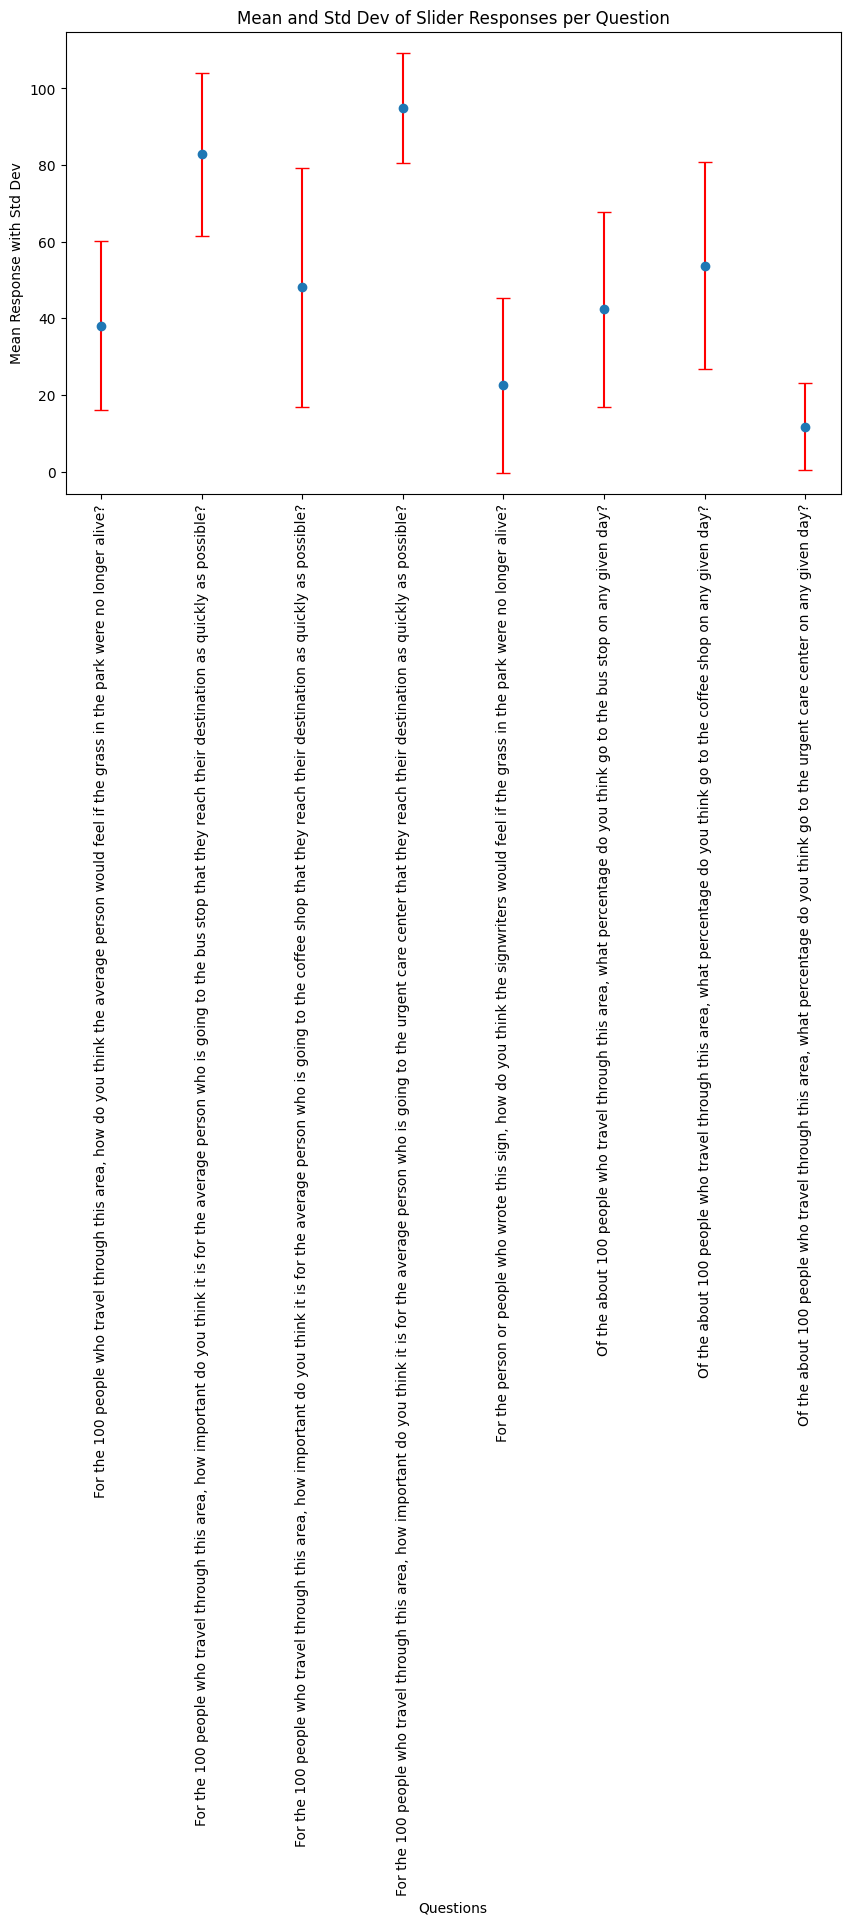

In [11]:

# Visualization of the mean and std for slider responses
plt.figure(figsize=(10, 6))
plt.errorbar(slider_summary['question'], slider_summary['mean'], yerr=slider_summary['std'], fmt='o', ecolor='r', capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Questions')
plt.ylabel('Mean Response with Std Dev')
plt.title('Mean and Std Dev of Slider Responses per Question')
plt.tight_layout()
plt.show()
